<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [19]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


In [20]:
# === Separar X/y ===
X = df.drop(columns='diagnosis')
y = df['diagnosis']

# Limpieza rápida (por si hubiese columnas no numéricas o constantes)
num_cols = X.select_dtypes(include=np.number).columns
X = X[num_cols]
const_cols = [c for c in X.columns if X[c].nunique() <= 1]
X = X.drop(columns=const_cols)
df = pd.concat([X, y], axis=1)

print(df.shape, "columnas constantes eliminadas:", const_cols)

(569, 31) columnas constantes eliminadas: []


,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Faltantes por columna:


,0


diagnosis
Benigno    357
Maligno    212
Name: count, dtype: int64


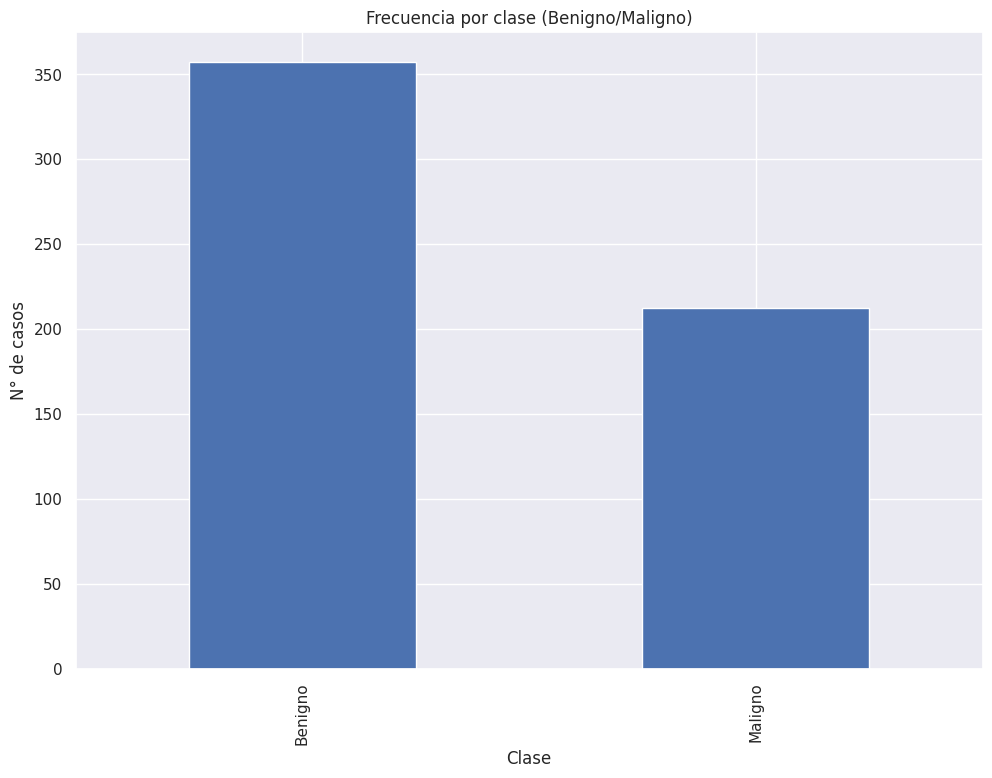

In [21]:
# Descripción estadística
display(df.describe().T)

# Datos nulos
print("Faltantes por columna:")
display(df.isna().sum()[lambda s: s>0])

# Cantidad por clases
cls_cnt = y.value_counts().rename(index={0:'Benigno',1:'Maligno'})
print(cls_cnt)

# Gráfico de balance de clases
plt.figure()
cls_cnt.plot(kind='bar')
plt.title('Frecuencia por clase (Benigno/Maligno)')
plt.xlabel('Clase'); plt.ylabel('N° de casos')
plt.show()

,frac_outliers
area_se,0.114236
radius_se,0.066784
perimeter_se,0.066784
area_worst,0.061511
smoothness_se,0.052724
fractal_dimension_se,0.049209
compactness_se,0.049209
symmetry_se,0.047452
area_mean,0.043937
fractal_dimension_worst,0.042179


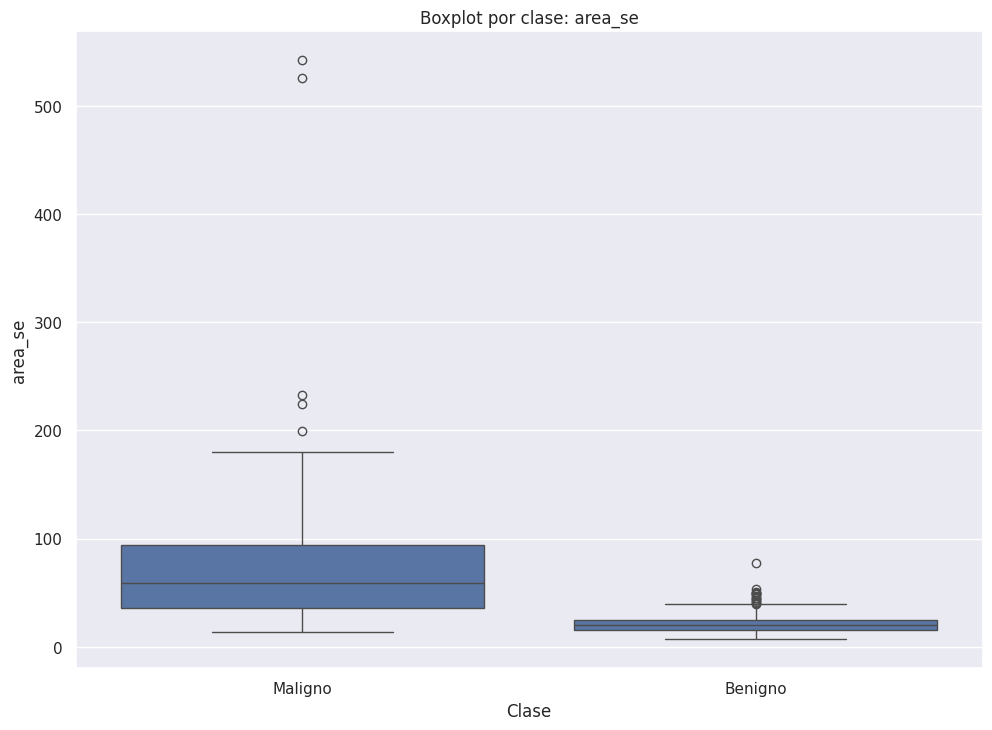

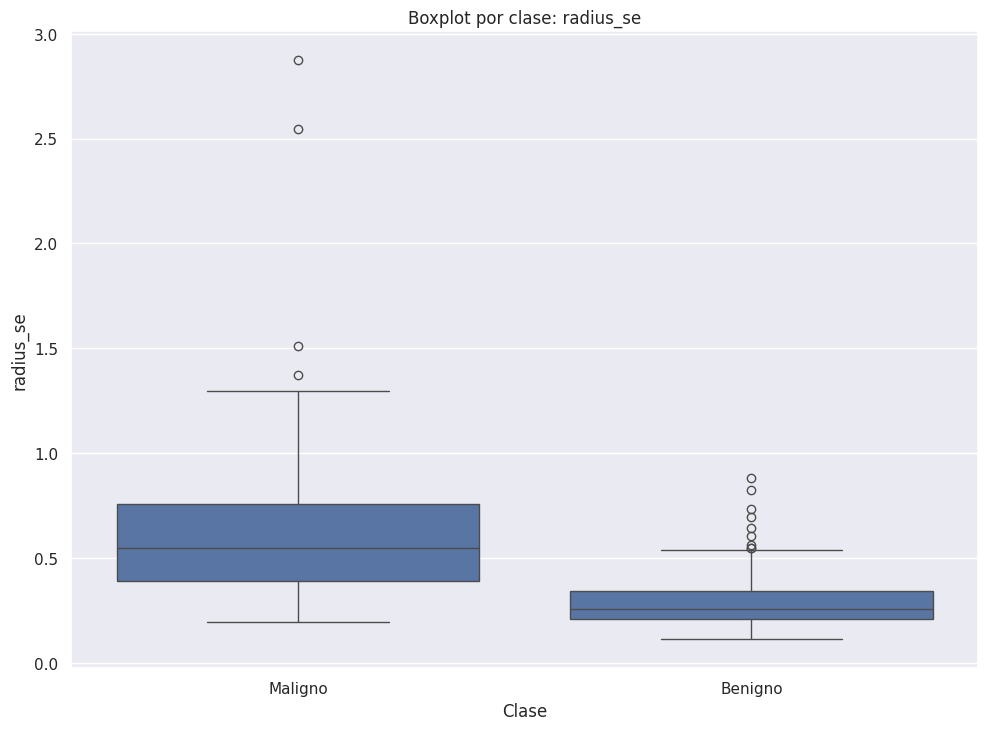

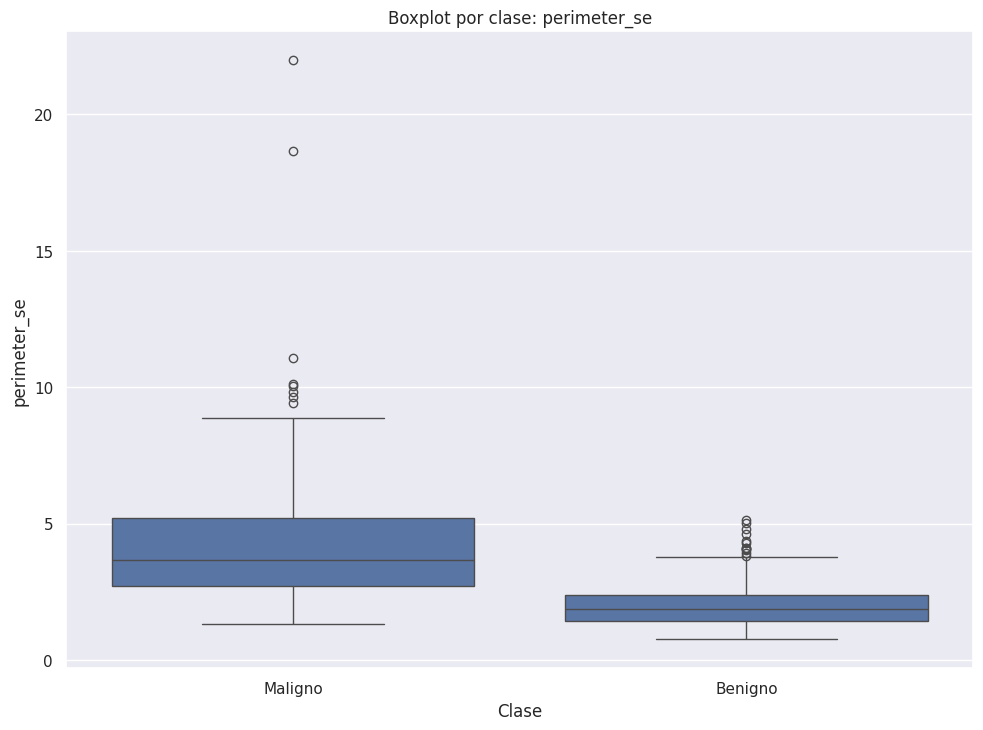

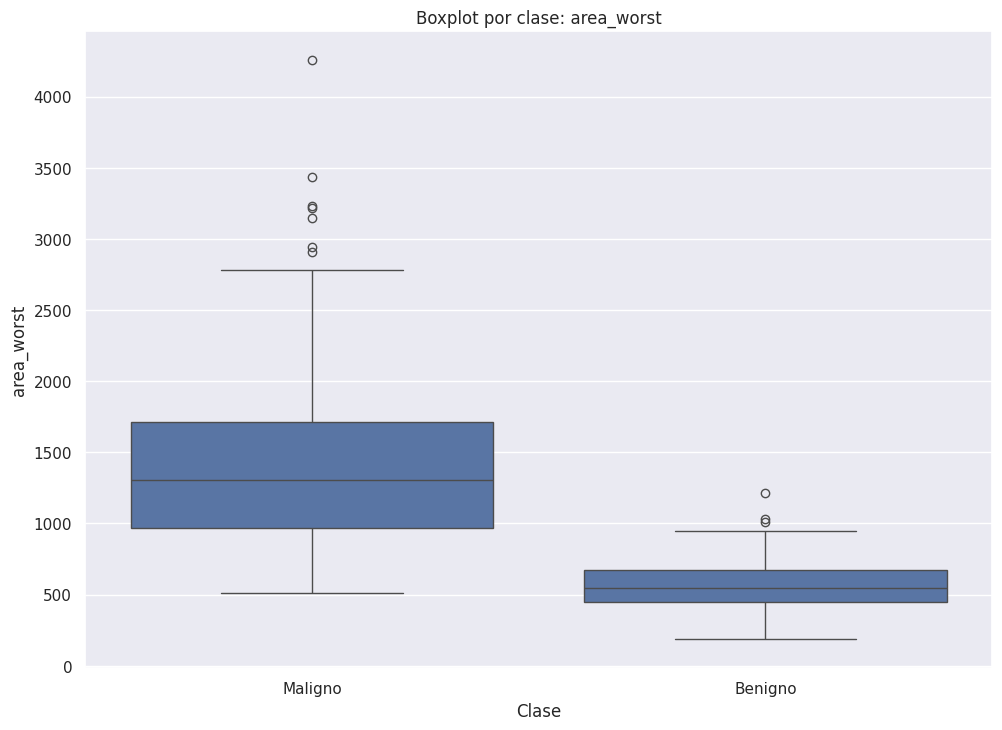

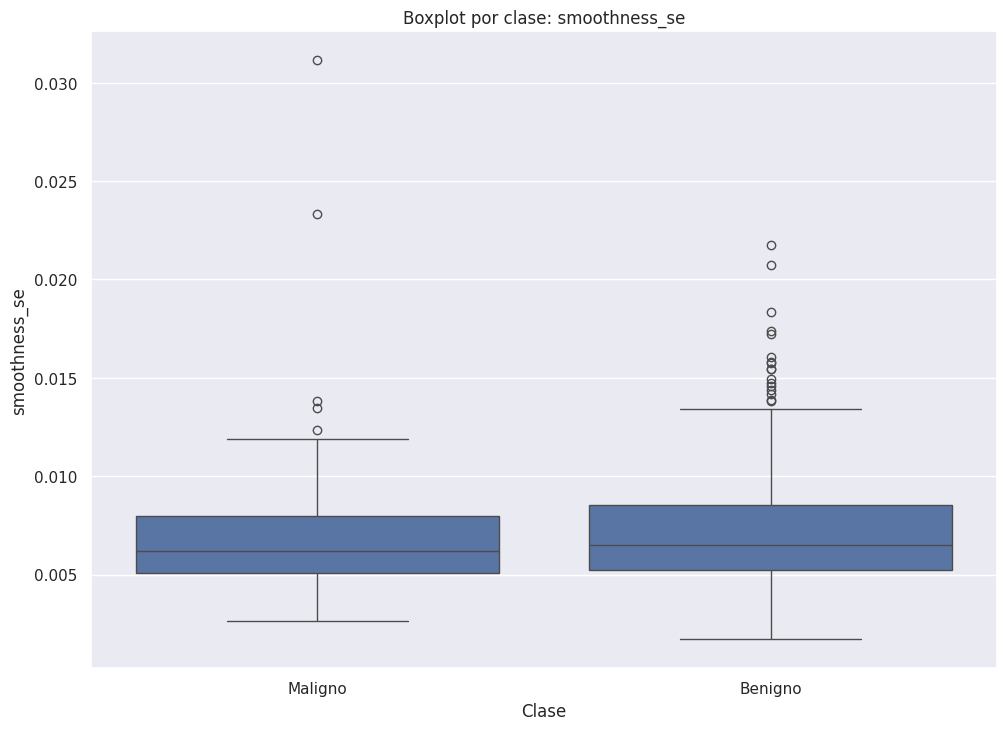

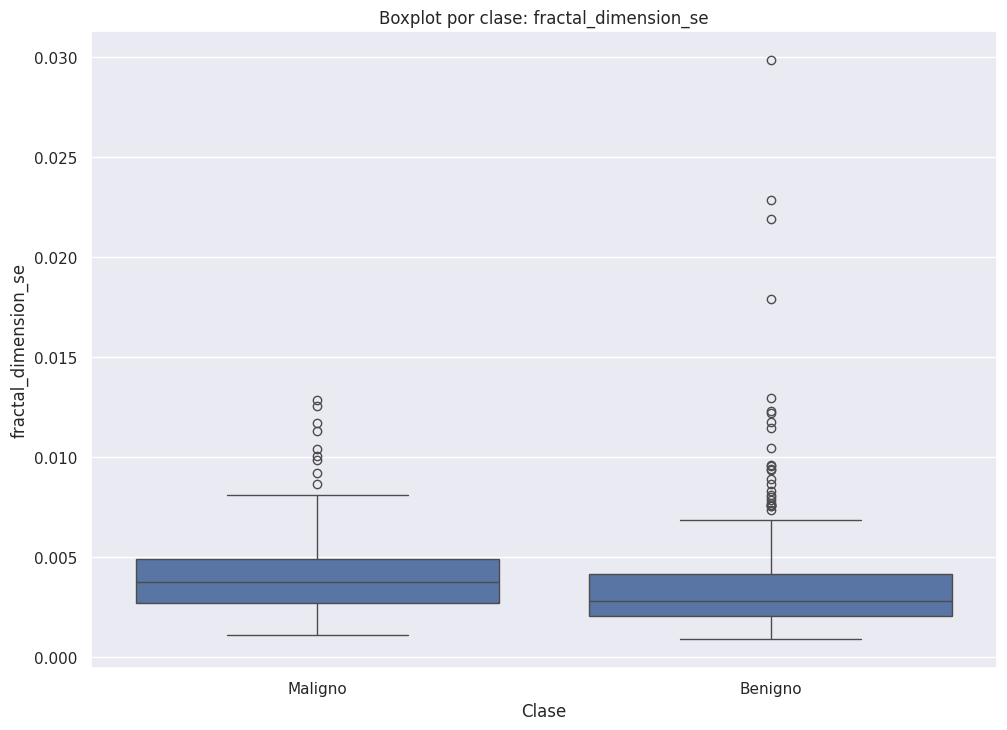

In [22]:
def iqr_outlier_fraction(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((s < lo) | (s > hi)).mean()

# Columnas con más proporción de outliers
outlier_frac = X.apply(iqr_outlier_fraction).sort_values(ascending=False)
top_out = outlier_frac.head(10).to_frame('frac_outliers')
display(top_out)

# Boxplots por clase de las 6 con más outliers
top6 = list(top_out.index[:6])
for col in top6:
    plt.figure()
    sns.boxplot(x=y.map({0:'Benigno',1:'Maligno'}), y=df[col])
    plt.title(f'Boxplot por clase: {col}')
    plt.xlabel('Clase'); plt.ylabel(col)
    plt.show()


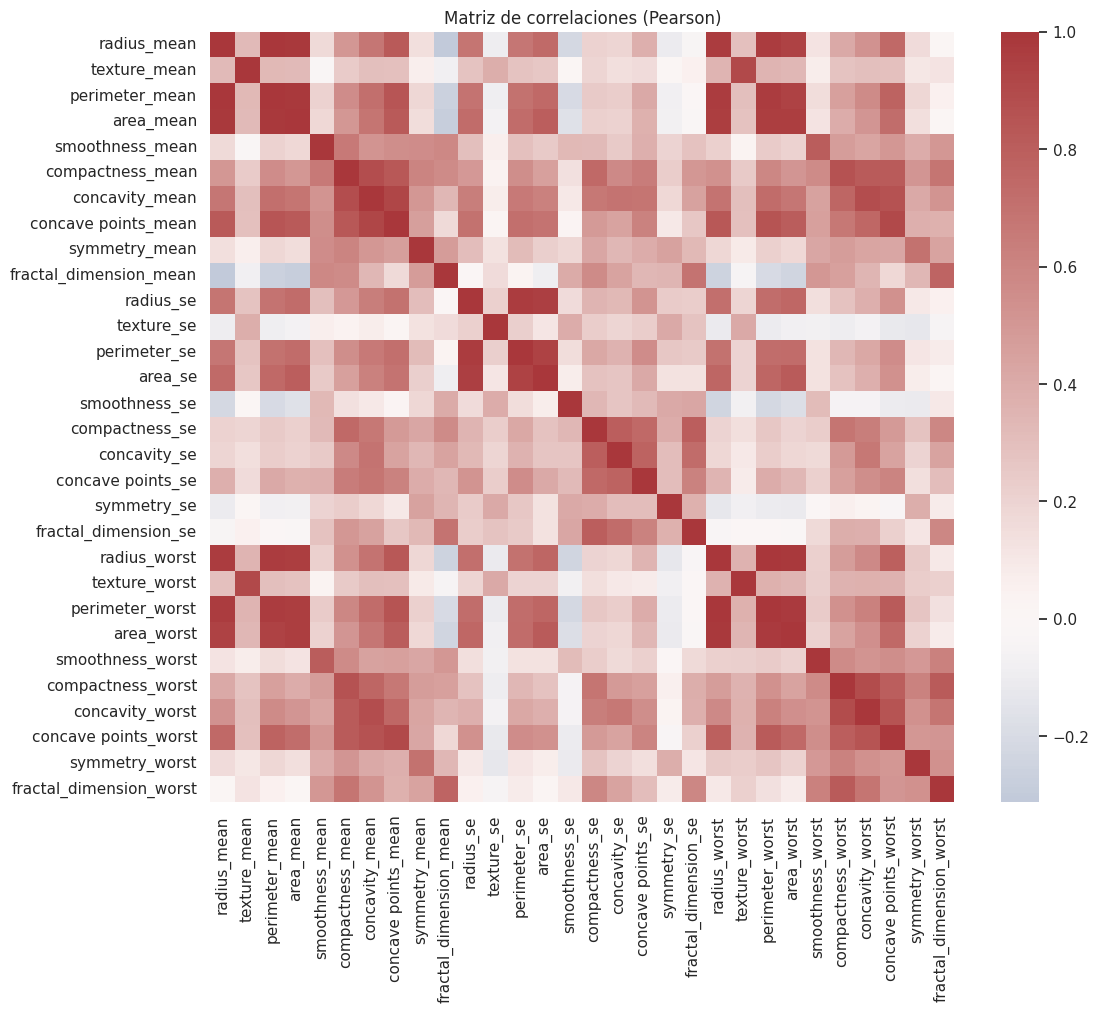

,feature_1,feature_2,corr
0,radius_mean,perimeter_mean,0.997855
12,radius_worst,perimeter_worst,0.993708
1,radius_mean,area_mean,0.987357
4,perimeter_mean,area_mean,0.986507
13,radius_worst,area_worst,0.984015
14,perimeter_worst,area_worst,0.977578
10,radius_se,perimeter_se,0.972794
6,perimeter_mean,perimeter_worst,0.970387
2,radius_mean,radius_worst,0.969539
5,perimeter_mean,radius_worst,0.969476


In [23]:
corr = X.corr(method='pearson')
# Heatmap de correlación
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='vlag', center=0, square=False)
plt.title('Matriz de correlaciones (Pearson)')
plt.show()

# Pares con |corr| > 0.95 para reducir multicolinealidad
high_pairs = []
thr = 0.95
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        v = corr.iloc[i,j]
        if abs(v) > thr:
            high_pairs.append((cols[i], cols[j], v))
high_df = pd.DataFrame(high_pairs, columns=['feature_1','feature_2','corr']).sort_values('corr', ascending=False)
display(high_df)


In [24]:
# AUC por feature
from sklearn.metrics import roc_auc_score

auc_list = []
for c in X.columns:
    try:
        auc = roc_auc_score(y, X[c])
    except ValueError:
        auc = np.nan
    auc_list.append((c, auc))
auc_df = pd.DataFrame(auc_list, columns=['feature','AUC']).sort_values('AUC', ascending=False)

# Cohen's d
def cohens_d(a, b):
    na, nb = len(a), len(b)
    va, vb = a.var(ddof=1), b.var(ddof=1)
    sp = np.sqrt(((na-1)*va + (nb-1)*vb) / (na+nb-2))
    return (a.mean() - b.mean()) / sp

d_list = []
g = df.groupby('diagnosis')
A, B = g.get_group(1), g.get_group(0)  # 1=Maligno, 0=Benigno
for c in X.columns:
    d = cohens_d(A[c], B[c])
    d_list.append((c, abs(d)))
d_df = pd.DataFrame(d_list, columns=['feature','|cohens_d|']).sort_values('|cohens_d|', ascending=False)

# Top-10 por AUC y por |d|
top_auc = auc_df.head(10)
top_d   = d_df.head(10)

print("Top-10 por AUC")
display(top_auc)
print("Top-10 por |Cohen's d|")
display(top_d)

Top-10 por AUC


,feature,AUC
22,perimeter_worst,0.975451
20,radius_worst,0.970443
23,area_worst,0.969828
27,concave points_worst,0.966704
7,concave points_mean,0.964438
2,perimeter_mean,0.946898
3,area_mean,0.938316
6,concavity_mean,0.937827
0,radius_mean,0.937517
13,area_se,0.926411


Top-10 por |Cohen's d|


,feature,|cohens_d|
27,concave points_worst,2.692647
22,perimeter_worst,2.598237
7,concave points_mean,2.545225
20,radius_worst,2.543903
2,perimeter_mean,2.289516
23,area_worst,2.230242
0,radius_mean,2.205463
3,area_mean,2.075651
6,concavity_mean,2.003275
26,concavity_worst,1.811931


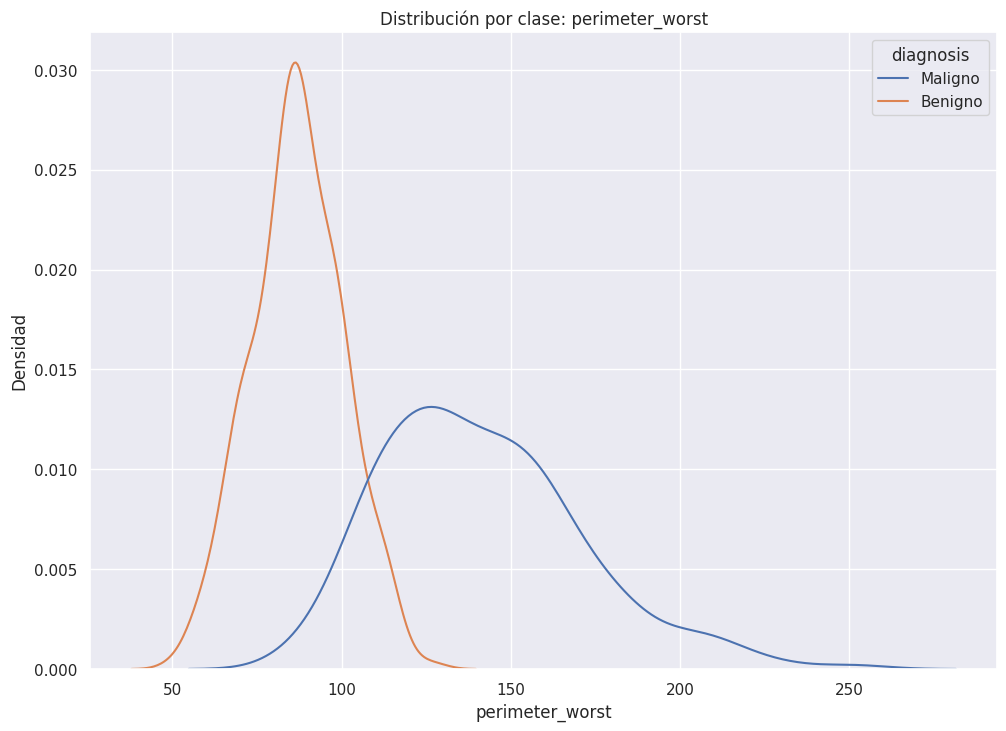

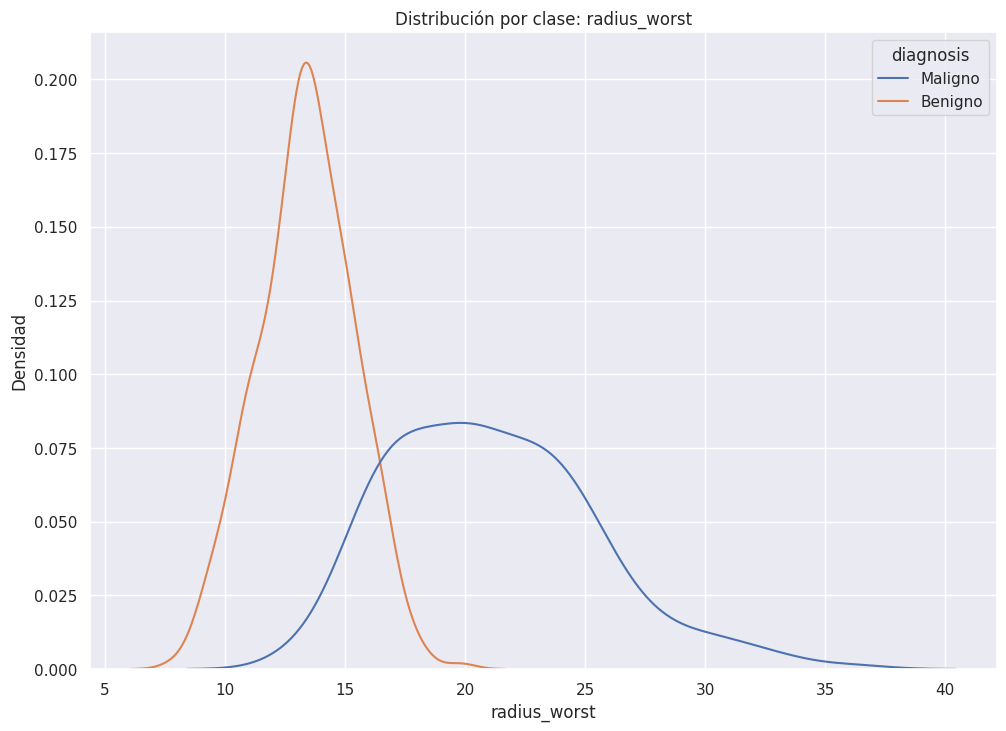

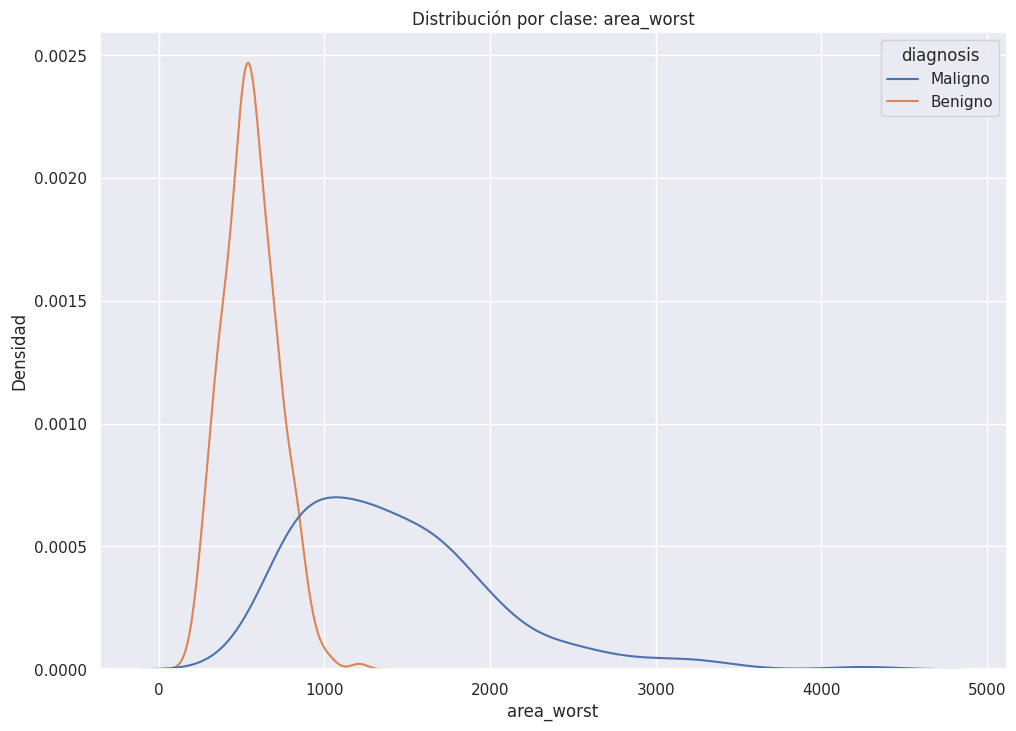

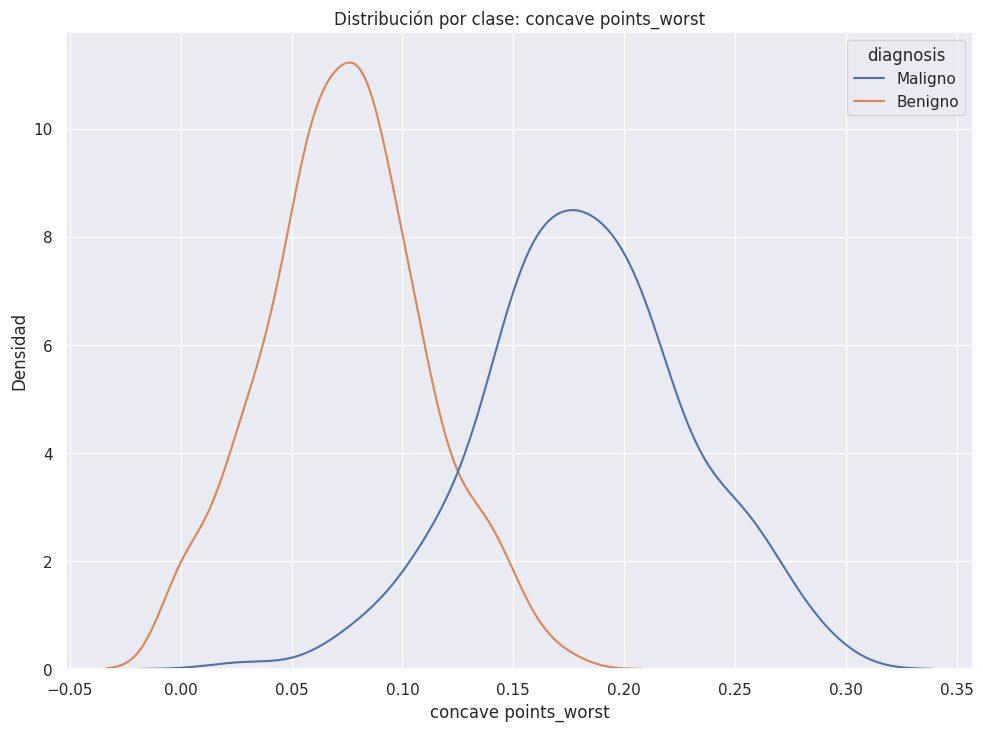

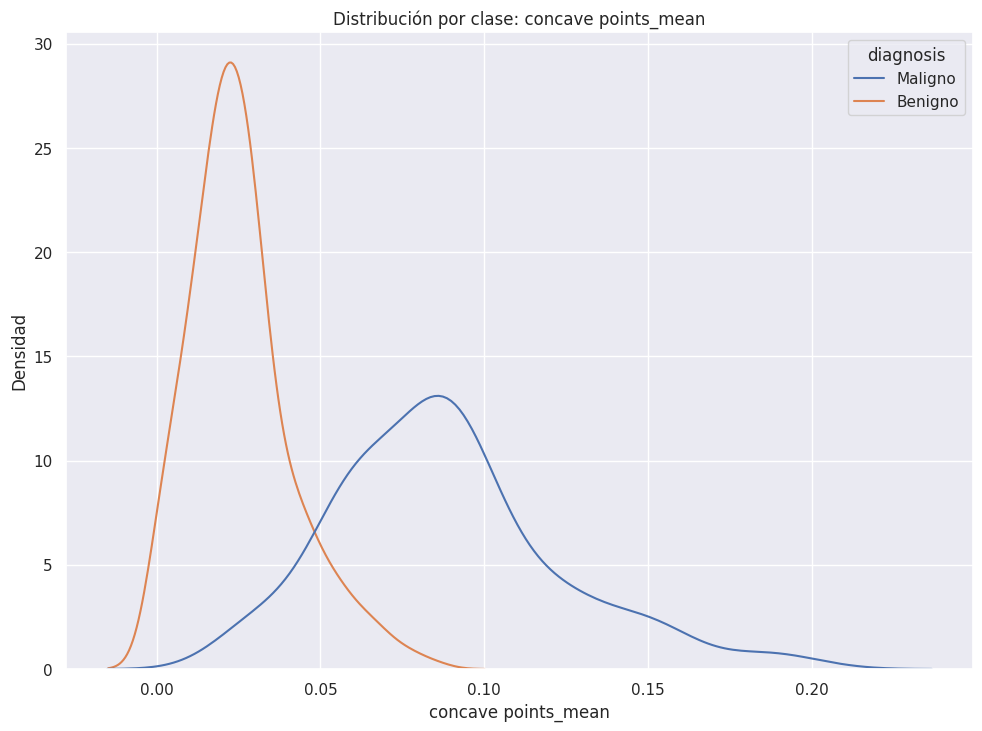

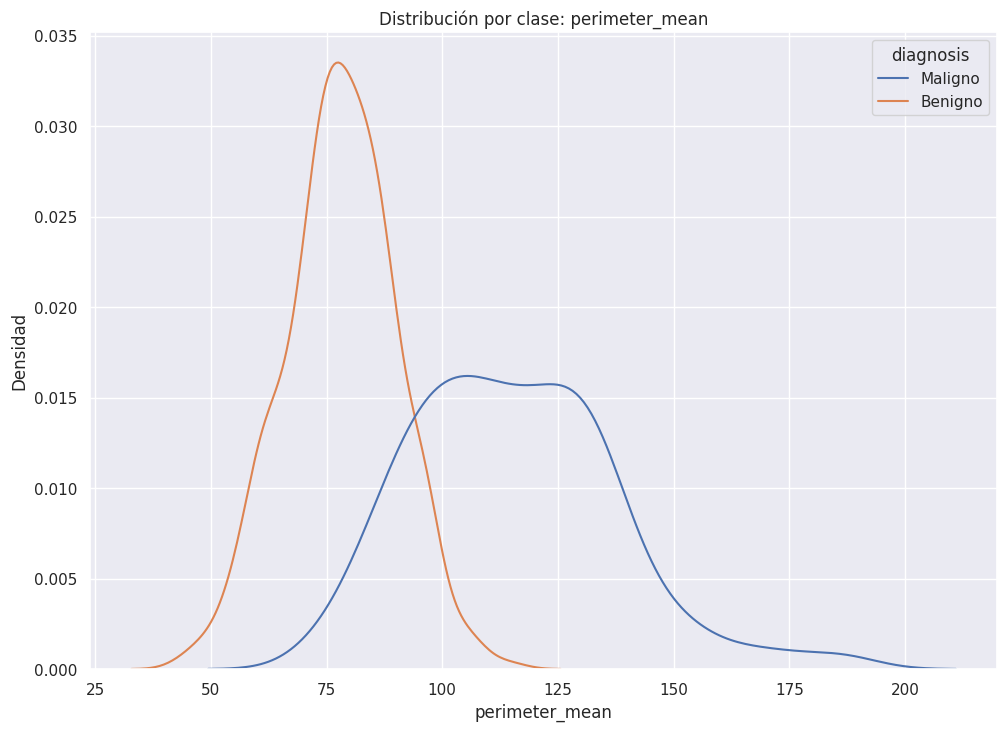

In [25]:
# Elegimos las 6 mejores por AUC
top6_auc = list(top_auc['feature'][:6])
for col in top6_auc:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue=df['diagnosis'].map({0:'Benigno',1:'Maligno'}), common_norm=False)
    plt.title(f'Distribución por clase: {col}')
    plt.xlabel(col); plt.ylabel('Densidad')
    plt.show()

De acuerdo a los puntajes de ROC-AUC, las variables que parecen tener mayor capacidad discriminativa son:


*   `perimeter_worst`
*   `radius_worst`
*   `area_worst`
*   `concave points_worst`
*   `concave points_mean`




2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


Vamos a **eliminar multicolinealidad** por correlación alta (|r|>0.95) con un criterio *greedy* que conserva la variable más discriminativa (AUC univariante) y descarta el resto del grupo. De esta manera, reducimos dimensionalidad sin perder las más informativas.

In [26]:
# --- utilidades ---
def auc_discriminativa(x, y):
    # usamos max(AUC, 1-AUC) para hacer la métrica invariante a invertir el eje
    auc = roc_auc_score(y, x)
    return max(auc, 1-auc)

def seleccionar_por_corr_auc(X, y, thr=0.95):
    """
    Regresa lista 'keep' de columnas seleccionadas evitando pares con |r|>thr,
    priorizando mayor AUC univariante.
    """
    X = X.copy()
    # 1) AUC por variable (solo entrenamiento)
    auc_s = pd.Series({c: auc_discriminativa(X[c].values, y.values) for c in X.columns})
    # 2) Orden decreciente por AUC
    orden = list(auc_s.sort_values(ascending=False).index)
    # 3) Matriz |corr|
    R = X[orden].corr().abs()
    keep = []
    for c in orden:
        if not keep:
            keep.append(c)
            continue
        # ¿está c muy correlacionada con alguna ya seleccionada?
        if (R.loc[c, keep] > thr).any():
            continue
        keep.append(c)
    drop = [c for c in X.columns if c not in keep]
    return keep, drop, auc_s

# Tenemos 569 datos -> elegimos 30% de los datos para testear
# Dividimos el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 281)

# --- selección en TRAIN únicamente ---
keep_cols, drop_cols, auc_train = seleccionar_por_corr_auc(X_train, y_train, thr=0.95)

print(f"Variables seleccionadas: {len(keep_cols)}  |  Eliminadas por colinealidad: {len(drop_cols)}")
pd.DataFrame({
    "feature": keep_cols,
    "AUC_train": [auc_train[c] for c in keep_cols]
}).head(10)

Variables seleccionadas: 24  |  Eliminadas por colinealidad: 6


,feature,AUC_train
0,perimeter_worst,0.981259
1,concave points_worst,0.967120
2,concave points_mean,0.964799
3,concavity_mean,0.942257
4,area_se,0.934787
5,concavity_worst,0.923516
6,perimeter_se,0.880512
7,compactness_mean,0.874523
8,compactness_worst,0.868908
9,concave points_se,0.792931


In [27]:
# Aplicamos StandardScaler
scaler_corr = StandardScaler().fit(X_train[keep_cols])  # SOLO con train
Xtr_std = scaler_corr.transform(X_train[keep_cols])
Xte_std = scaler_corr.transform(X_test[keep_cols])

Xtr_std.shape, Xte_std.shape

((398, 24), (171, 24))


3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


**Suposición:** De ahora en adelante, trabajaremos con los datos **preprocesados** (con la eliminación de multicolinealidad hecha).

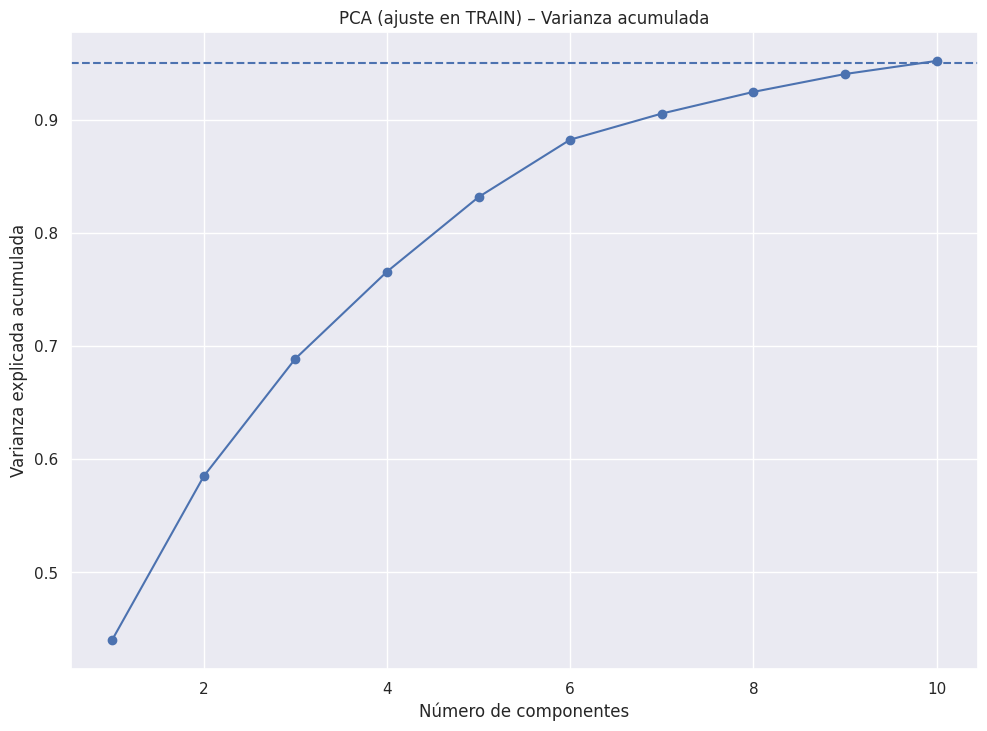

Componentes para ≥95% var.: 10
Varianza explicada por las 2 primeras componentes:
PC1: 0.440
PC2: 0.145
Varianza acumulada (PC1 + PC2): 0.585


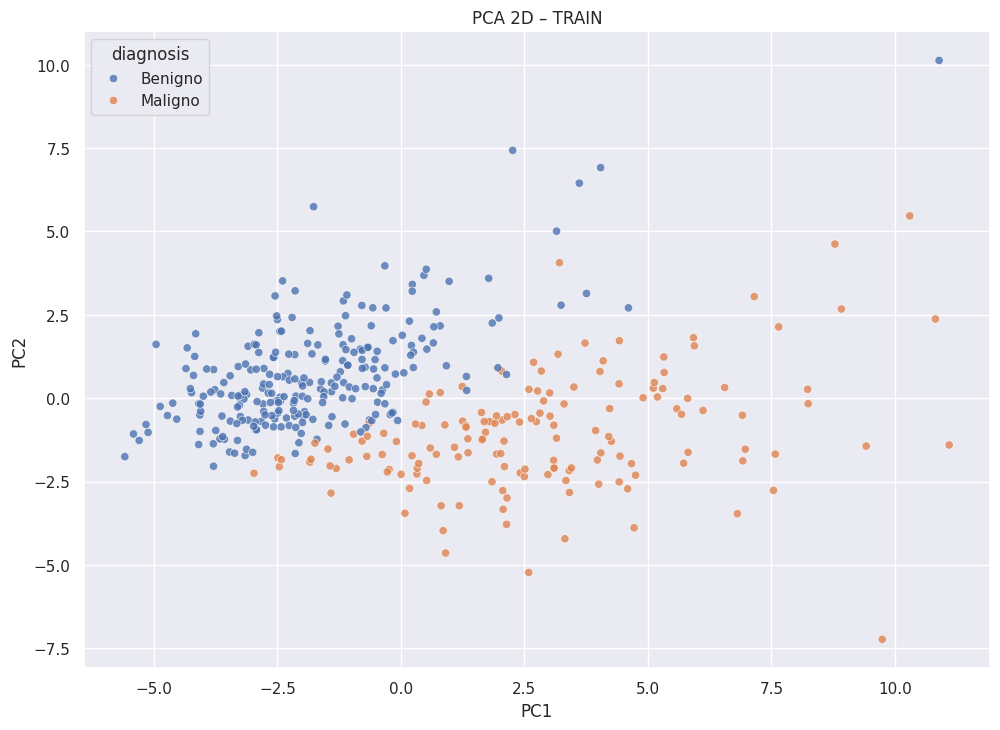

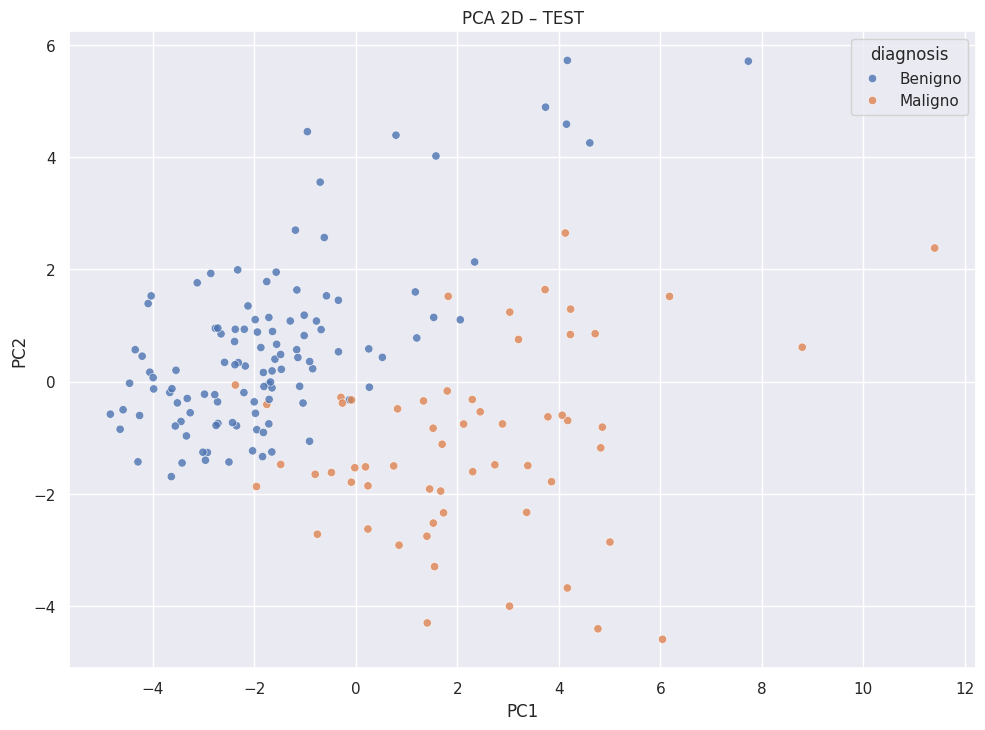

AUC usando solo PC1 – TRAIN: 0.921 | TEST: 0.906


In [28]:
# --- Varianza explicada acumulada (PCA ajustado en TRAIN) ---
pca95 = PCA(n_components=0.95, svd_solver='full', random_state=281).fit(Xtr_std)
ev_cum = pca95.explained_variance_ratio_.cumsum()

plt.figure()
plt.plot(range(1, len(ev_cum)+1), ev_cum, marker='o')
plt.axhline(0.95, linestyle='--')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('PCA (ajuste en TRAIN) – Varianza acumulada')
plt.grid(True)
plt.show()

print("Componentes para ≥95% var.:", pca95.n_components_)

# --- Proyección 2D con PCA --- (ajustar en TRAIN y transformar ambos)
pca2 = PCA(n_components=2, random_state=281).fit(Xtr_std)
Ztr_pca2 = pca2.transform(Xtr_std)
Zte_pca2 = pca2.transform(Xte_std)

# Mostrar la varianza explicada por las 2 primeras componentes
print("Varianza explicada por las 2 primeras componentes:")
print(f"PC1: {pca2.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca2.explained_variance_ratio_[1]:.3f}")
print(f"Varianza acumulada (PC1 + PC2): {pca2.explained_variance_ratio_.sum():.3f}")


# Gráfico TRAIN
plt.figure()
sns.scatterplot(x=Ztr_pca2[:,0], y=Ztr_pca2[:,1], hue=y_train.map({0:'Benigno',1:'Maligno'}), alpha=0.8)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA 2D – TRAIN')
plt.show()

# Gráfico TEST (mismas componentes aprendidas en TRAIN)
plt.figure()
sns.scatterplot(x=Zte_pca2[:,0], y=Zte_pca2[:,1], hue=y_test.map({0:'Benigno',1:'Maligno'}), alpha=0.8)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA 2D – TEST')
plt.show()

# Métricas orientativas de separabilidad
auc_pc1_train = roc_auc_score(y_train, Ztr_pca2[:,0])
auc_pc1_test  = roc_auc_score(y_test,  Zte_pca2[:,0])

print(f"AUC usando solo PC1 – TRAIN: {auc_pc1_train:.3f} | TEST: {auc_pc1_test:.3f}")

Para explicar al menos el 95% de la varianza, se necesitan 10 componentes.

Por otro lado, con 2 componentes principales, logramos un 58% de varianza explicada. En este espacio reducido, se logra visualizar claramente la separación de las clases, aunque con algo de solapamiento entre ellas.


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


Entrenaremos los modelos Regresión Logística, KNN y Random Forest

=== LogisticRegression ===
Mejores hiperparámetros: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
AUC CV: 0.997 | AUC TEST: 0.988
ACC: 0.971 | PREC: 0.982 | REC: 0.932 | F1: 0.957


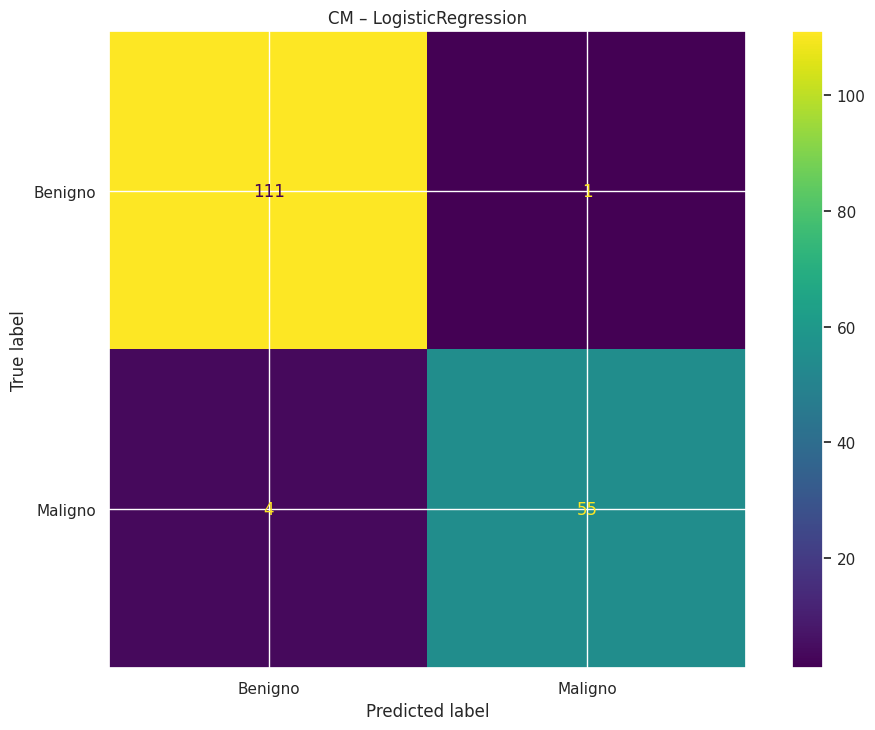

              precision    recall  f1-score   support

           0      0.965     0.991     0.978       112
           1      0.982     0.932     0.957        59

    accuracy                          0.971       171
   macro avg      0.974     0.962     0.967       171
weighted avg      0.971     0.971     0.971       171



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             ConfusionMatrixDisplay)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=281)

# Regresión Logística
grid_lr = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear'],
        'penalty': ['l2'],
        'class_weight': [None, 'balanced'],
        'max_iter': [2000]
    },
    scoring='roc_auc', cv=cv, n_jobs=-1, refit=True
)
grid_lr.fit(Xtr_std, y_train)

# Evaluación en TEST (escalado consistente de etapa 2)
yprob_lr = grid_lr.predict_proba(Xte_std)[:,1]
ypred_lr = (yprob_lr >= 0.5).astype(int)

print("=== LogisticRegression ===")
print("Mejores hiperparámetros:", grid_lr.best_params_)
print(f"AUC CV: {grid_lr.best_score_:.3f} | AUC TEST: {roc_auc_score(y_test, yprob_lr):.3f}")
print(f"ACC: {accuracy_score(y_test, ypred_lr):.3f} | PREC: {precision_score(y_test, ypred_lr):.3f} "
      f"| REC: {recall_score(y_test, ypred_lr):.3f} | F1: {f1_score(y_test, ypred_lr):.3f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_lr),
                       display_labels=['Benigno','Maligno']).plot(values_format='d');
plt.title("CM – LogisticRegression"); plt.show()
print(classification_report(y_test, ypred_lr, digits=3))




=== KNN ===
Mejores hiperparámetros: {'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
AUC CV: 0.995 | AUC TEST: 0.979
ACC: 0.942 | PREC: 0.930 | REC: 0.898 | F1: 0.914


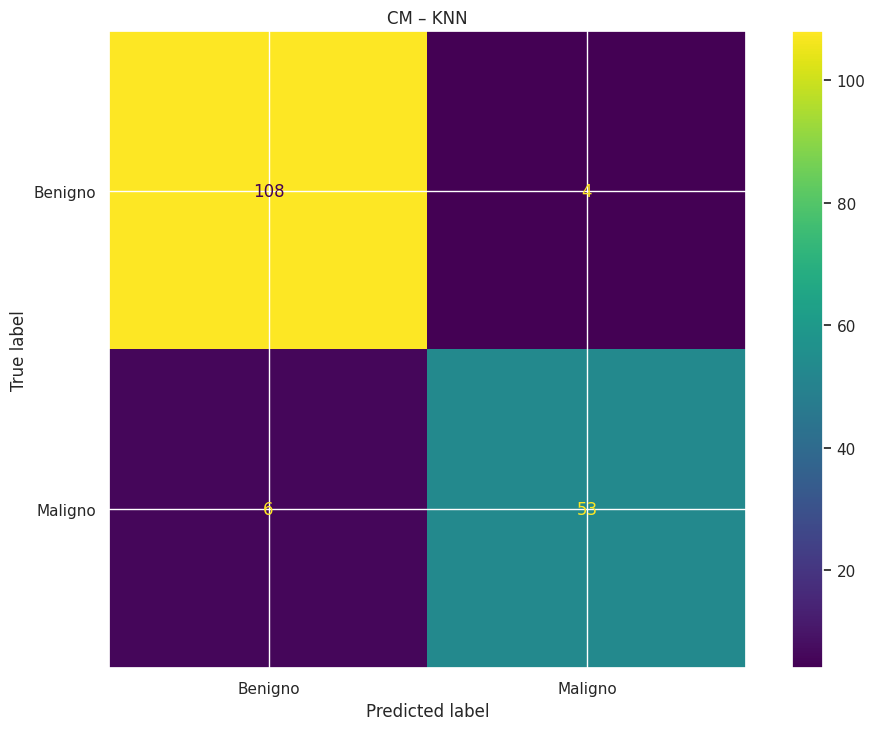

              precision    recall  f1-score   support

           0      0.947     0.964     0.956       112
           1      0.930     0.898     0.914        59

    accuracy                          0.942       171
   macro avg      0.939     0.931     0.935       171
weighted avg      0.941     0.942     0.941       171



In [30]:
# K-Nearest Neighbors
grid_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid={
        'n_neighbors': [3,5,7,9,11,15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]        # Manhattan / Euclidiana
    },
    scoring='roc_auc', cv=cv, n_jobs=-1, refit=True
)
grid_knn.fit(Xtr_std, y_train)

yprob_knn = grid_knn.predict_proba(Xte_std)[:,1]
ypred_knn = (yprob_knn >= 0.5).astype(int)

print("\n=== KNN ===")
print("Mejores hiperparámetros:", grid_knn.best_params_)
print(f"AUC CV: {grid_knn.best_score_:.3f} | AUC TEST: {roc_auc_score(y_test, yprob_knn):.3f}")
print(f"ACC: {accuracy_score(y_test, ypred_knn):.3f} | PREC: {precision_score(y_test, ypred_knn):.3f} "
      f"| REC: {recall_score(y_test, ypred_knn):.3f} | F1: {f1_score(y_test, ypred_knn):.3f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_knn),
                       display_labels=['Benigno','Maligno']).plot(values_format='d');
plt.title("CM – KNN"); plt.show()
print(classification_report(y_test, ypred_knn, digits=3))


=== RandomForest ===
Mejores hiperparámetros: {'class_weight': None, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 400}
AUC CV: 0.995 | AUC TEST: 0.987
ACC: 0.965 | PREC: 0.965 | REC: 0.932 | F1: 0.948


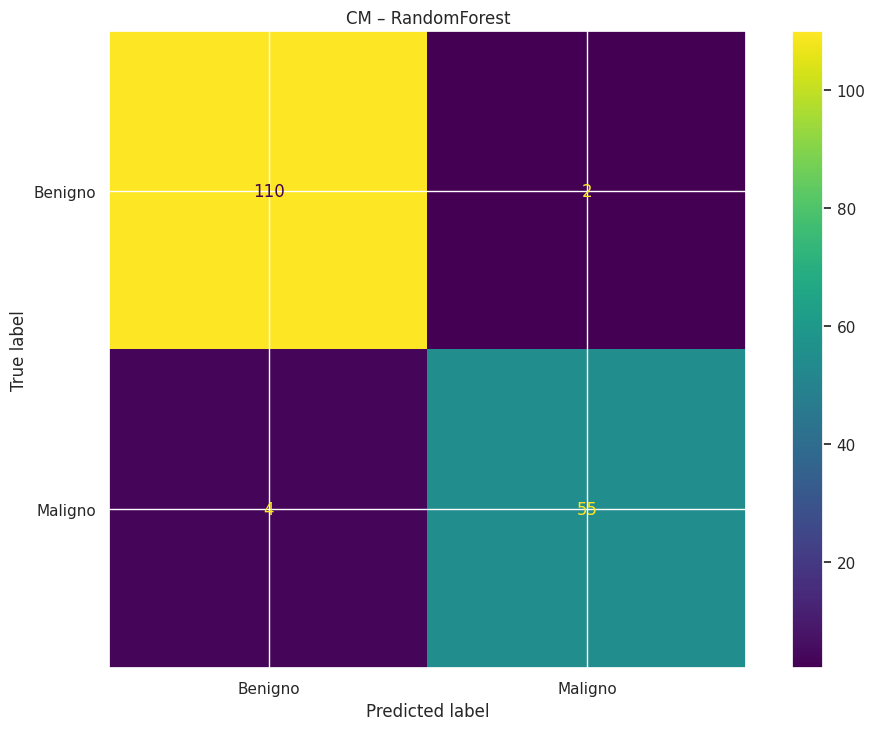

              precision    recall  f1-score   support

           0      0.965     0.982     0.973       112
           1      0.965     0.932     0.948        59

    accuracy                          0.965       171
   macro avg      0.965     0.957     0.961       171
weighted avg      0.965     0.965     0.965       171



In [34]:
# Random Forest
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=281, n_jobs=-1),
    param_grid={
        'n_estimators': [200, 400],
        'max_depth': [None, 8, 16, 24],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    },
    scoring='roc_auc', cv=cv, n_jobs=-1, refit=True
)
grid_rf.fit(Xtr_std, y_train)

yprob_rf = grid_rf.predict_proba(Xte_std)[:,1]
ypred_rf = (yprob_rf >= 0.5).astype(int)

print("\n=== RandomForest ===")
print("Mejores hiperparámetros:", grid_rf.best_params_)
print(f"AUC CV: {grid_rf.best_score_:.3f} | AUC TEST: {roc_auc_score(y_test, yprob_rf):.3f}")
print(f"ACC: {accuracy_score(y_test, ypred_rf):.3f} | PREC: {precision_score(y_test, ypred_rf):.3f} "
      f"| REC: {recall_score(y_test, ypred_rf):.3f} | F1: {f1_score(y_test, ypred_rf):.3f}")
ConfusionMatrixDisplay(confusion_matrix(y_test, ypred_rf),
                       display_labels=['Benigno','Maligno']).plot(values_format='d');
plt.title("CM – RandomForest"); plt.show()
print(classification_report(y_test, ypred_rf, digits=3))


In [35]:
resumen = pd.DataFrame([
    ['LogisticRegression', grid_lr.best_score_, roc_auc_score(y_test, yprob_lr),
     accuracy_score(y_test, ypred_lr), precision_score(y_test, ypred_lr),
     recall_score(y_test, ypred_lr), f1_score(y_test, ypred_lr)],
    ['KNN', grid_knn.best_score_, roc_auc_score(y_test, yprob_knn),
     accuracy_score(y_test, ypred_knn), precision_score(y_test, ypred_knn),
     recall_score(y_test, ypred_knn), f1_score(y_test, ypred_knn)],
    ['RandomForest', grid_rf.best_score_, roc_auc_score(y_test, yprob_rf),
     accuracy_score(y_test, ypred_rf), precision_score(y_test, ypred_rf),
     recall_score(y_test, ypred_rf), f1_score(y_test, ypred_rf)],
], columns=['Modelo','AUC_CV','AUC_TEST','ACC','PREC','REC','F1']).sort_values('AUC_TEST', ascending=False)

resumen


,Modelo,AUC_CV,AUC_TEST,ACC,PREC,REC,F1
0,LogisticRegression,0.996941,0.988045,0.970760,0.982143,0.932203,0.956522
2,RandomForest,0.994553,0.986834,0.964912,0.964912,0.932203,0.948276
1,KNN,0.995449,0.979116,0.941520,0.929825,0.898305,0.913793


De acuerdo a la tabla anterior, Regresión Logística es el modelo con mayor poder discriminativo en test y con la brecha más controlada entre validación y test, por lo que ofrece el mejor compromiso entre precisión y generalización.


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



En conclusión, el modelo más apropiado para este conjunto de datos es **Regresión Logística**, pues ofrece el mejor compromiso entre precisión y generalización: AUC-TEST ≈ 0.988, ACC ≈ 0.971, F1 ≈ 0.957 y brecha entre CV y TEST menor que en RandomForest y KNN.

Respecto al preprocesamiento, podemos afirmar que la estandarización fue crucial para LogisticRegression y para KNN; estabilizó la optimización y redujo el riesgo de overfitting. Asimismo, al condensar o descartar variables altamente correlacionadas mediante eliminación de multicolinealidad y PCA, se redujo la varianza del modelo y se mejoró la estabilidad de las métricas.

De igual manera, la validación cruzada permitió ajustar hiperparámetros y usar la diferencia entre los grupos de entrenamiento y testeo como un indicador de overfitting. La pequeña diferencia observada respalda la solidez de la predicción.

Por último, para uso clínico, conviene afinar el umbral para alcanzar una sensibilidad mínima (or ejemplo, >=0.95) y considerar ponderación de costos o `class_weight='balanced'`. Asimismo, se deben validar externamente los resultados, con datos en otro hospital o periodo, antes de su despliegue como sistema de apoyo al diagnóstico médico.